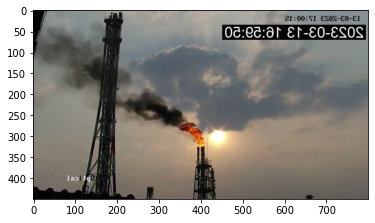

In [12]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('V:/data_annotation/train_valid_test_data/train/augmentation/fliplr/images/fliplr_pico_000020.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [1]:
import cv2, os, shutil
import numpy as np
def generate_random_lines(imshape,slant,drop_length):
    drops=[]    
    for i in range(np.random.randint(100,1500)): ## If You want heavy rain, try increasing this        
        x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))    
    return drops            

def add_rain(image):        
    imshape = image.shape    
    slant_extreme=np.random.randint(2,20) # default 10
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=np.random.randint(2,20) # default 20
    drop_width=1 # default 2
    drop_color=(200,200,200) ## a shade of gray    
    # print(imshape, slant, drop_length)

    blur = np.random.randint(2,5)
    image= cv2.blur(image,(blur,blur)) ## rainy view are blurry        
    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(img=image,pt1=(rain_drop[0],rain_drop[1]),pt2=(rain_drop[0]+slant,rain_drop[1]+drop_length),color=drop_color,thickness=drop_width)    
        brightness_coefficient = np.random.randint(7,10)/10 ## rainy days are usually shady    defalut 0.7 
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

In [3]:
src = 'V:/data_annotation/train_valid_test_data/test'
aug_name = 'rain'

import os, cv2, shutil
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
img_dir = 'images'
img_path = os.path.join(src,img_dir)

img_files = os.listdir(img_path)
files = []
for file in img_files:
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        files.append(file)
img_files = files
img_files.sort()

dst = f'augmentation/{aug_name}'
dst_images = os.path.join(src, dst, img_dir)
label_dir = 'labels'
label_path = os.path.join(src, label_dir)
dst_labels = os.path.join(src, dst, label_dir)
if not os.path.exists(dst_images):
    os.makedirs(dst_images)
if not os.path.exists(dst_labels):
    os.makedirs(dst_labels)

for file in tqdm(img_files):
    # print(file)
    img = cv2.imread(os.path.join(img_path,file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = add_rain(img)
    plt.imsave(os.path.join(dst_images, aug_name+'_'+file), img)
    ann_path = os.path.join(label_path,f'{file[:-3]}txt')
    ann_aug_path = os.path.join(dst_labels, f'{aug_name}_{file[:-3]}txt')
    shutil.copy(ann_path, ann_aug_path)

  0%|          | 0/6558 [00:00<?, ?it/s]

In [6]:
ann_path

'V:/data_annotation/train_valid_test_data/test\\labels\\uhv_000859.txt'

In [7]:
for file in tqdm(img_files):
    # print(file)
    ann_path = os.path.join(label_path,f'{file[:-3]}txt')
    ann_aug_path = os.path.join(dst_labels, f'{aug_name}_{file[:-3]}txt')
    shutil.copy(ann_path, ann_aug_path)

  0%|          | 0/6558 [00:00<?, ?it/s]

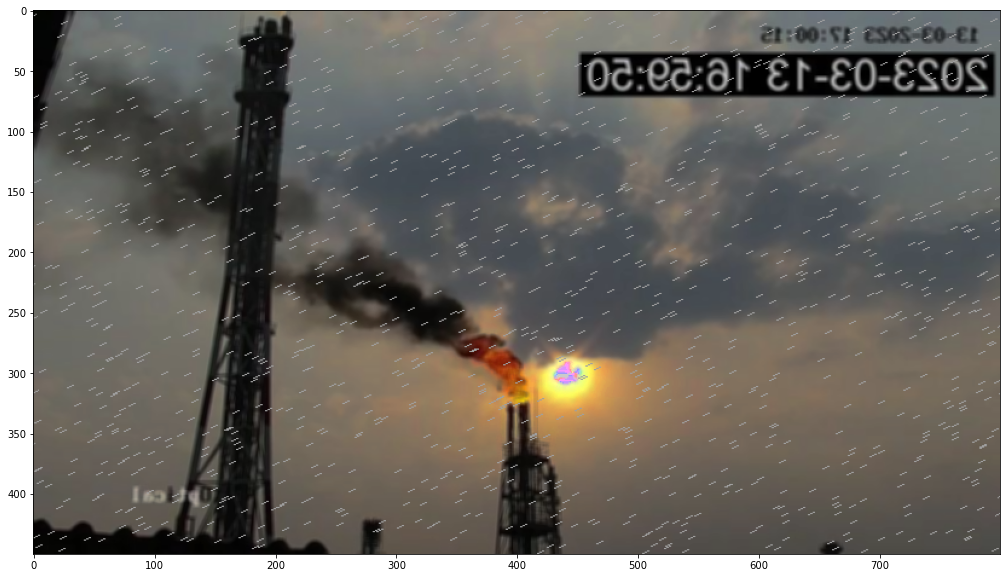

In [64]:
rain_img = add_rain(image)
plt.figure(figsize=(30,10))
plt.imshow(rain_img)